In [54]:
import pandas as pd
from bertopic import BERTopic
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model)

# read data
df = pd.read_csv('../data/wps_speeches.csv')
df['only text'] = df['only text'].astype(str)
docs = df['only text'].tolist()
years = df['year'].tolist()

# get topics and probs
topics, probs = topic_model.fit_transform(docs)

In [56]:
topic_model.get_topic_info()

Topic  Count                                  Name  \
0      -1    841      -1_women_violence_security_peace   
1       0    177     0_trafficking_human_persons_crime   
2       1    131     1_sexual_violence_conflict_united   
3       2     57      2_asean_indonesia_malaysia_women   
4       3     54    3_chile_civilians_protection_women   
..    ...    ...                                   ...   
60     59     11  59_ireland_peace_security_resolution   
61     60     11       60_hungary_czech_peace_republic   
62     61     11   61_afghanistan_afghan_taliban_women   
63     62     11         62_nato_natos_gender_security   
64     63     10        63_uganda_indicators_1325_2000   

                                       Representation  \
0   [women, violence, security, peace, sexual, con...   
1   [trafficking, human, persons, crime, slavery, ...   
2   [sexual, violence, conflict, united, council, ...   
3   [asean, indonesia, malaysia, women, violence, ...   
4   [chile, civilians, protection, women, girls, a...   
..                                                ...   
60  [ireland, peace, security, resolution, irish, ...   
61  [hungary, czech, peace, republic, agenda, secu...   
62  [afghanistan, afghan, taliban, women, governme...   
63  [nato, natos, gender, security, allies, natole...   
64  [uganda, indicators, 1325, 2000, ugandas, reso...   

                                  Representative_Docs  
0   [ I would join the Deputy Secretary- General a...  
1   [ Let me first thank the United Kingdom presid...  
2   [ I thank you, Mr. President, for presiding ov...  
3   [ I have the honour to speak on behalf of the ...  
4   [ I should like to thank and congratulate the ...  
..                                                ...  
60  [ I am grateful to the Council for the opportu...  
61  [ Hungary aligns itself with the statement del...  
62  [ First, allow me to congratulate you, Mr. Pre...  
63  [ Gender equality is not optional. It is essen...  
64  [ I would like to thank you, Mr. President, fo...  

[65 rows x 5 columns]

In [57]:
topic_model.visualize_topics()

In [58]:
# reduce topics (from 58 to 10)
topic_model.reduce_topics(docs, nr_topics=10)

# Access updated topics
topics = topic_model.topics_
topic_model.get_topic_info()

Topic  Count                                     Name  \
0     -1    841         -1_women_violence_security_peace   
1      0   1018        0_women_peace_security_resolution   
2      1    374        1_sexual_violence_conflict_united   
3      2    177        2_trafficking_human_persons_crime   
4      3     57          3_women_ukraine_security_rights   
5      4     30       4_peacebuilding_nations_united_pbc   
6      5     25           5_syrian_sexual_violence_syria   
7      6     21     6_displaced_women_girls_displacement   
8      7     12  7_venezuela_operations_armed_bolivarian   
9      8     11        8_afghanistan_afghan_women_womens   

                                      Representation  \
0  [women, violence, security, peace, sexual, con...   
1  [women, peace, security, resolution, conflict,...   
2  [sexual, violence, conflict, united, women, na...   
3  [trafficking, human, persons, crime, victims, ...   
4  [women, ukraine, security, rights, peace, conf...   
5  [peacebuilding, nations, united, pbc, report, ...   
6  [syrian, sexual, violence, syria, women, girls...   
7  [displaced, women, girls, displacement, refuge...   
8  [venezuela, operations, armed, bolivarian, vio...   
9  [afghanistan, afghan, women, womens, rights, t...   

                                 Representative_Docs  
0  [ Mr. President, I want to thank you and the G...  
1  [ I thank the French presidency for putting th...  
2  [ I am pleased to speak on behalf of the Group...  
3  [ Ijoin the previous speakers in commending yo...  
4  [ Allow me to thank the Secretary-General; Ms....  
5  [ My delegation wants to congratulate you, Sir...  
6  [ At the outset, I should like to congratulate...  
7  [ I thank you, Madam President, for convening ...  
8  [ We welcome the convening of today's meeting ...  
9  [ At the outset, I would like to thank the Uni...

In [59]:
topic_model.visualize_topics()

0


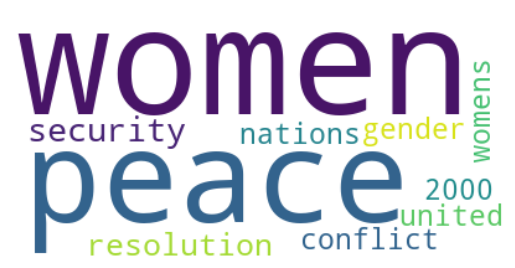

1


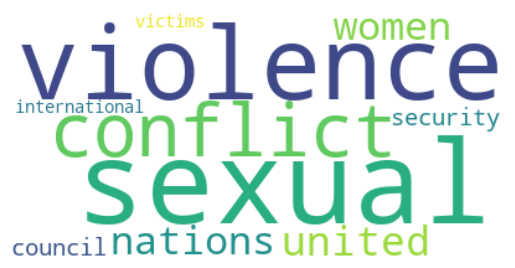

2


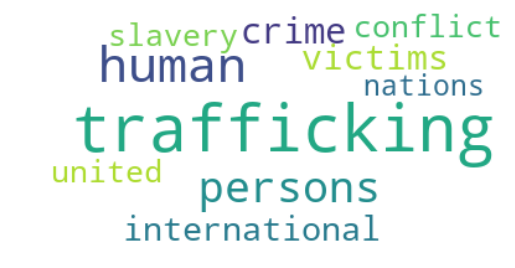

3


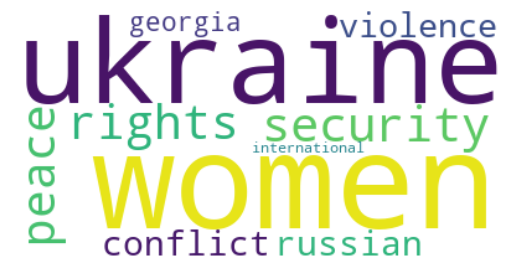

4


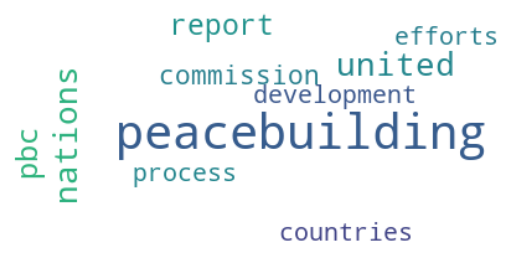

5


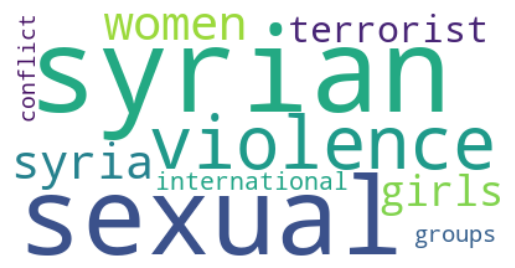

6


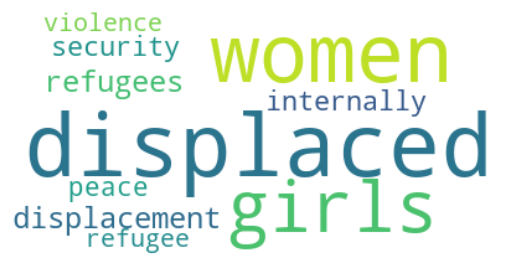

7


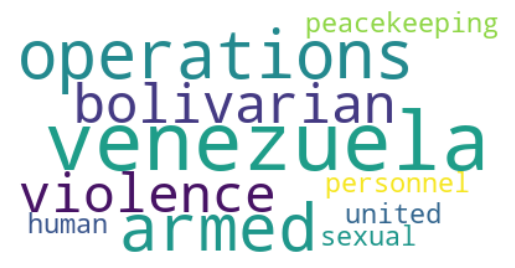

8


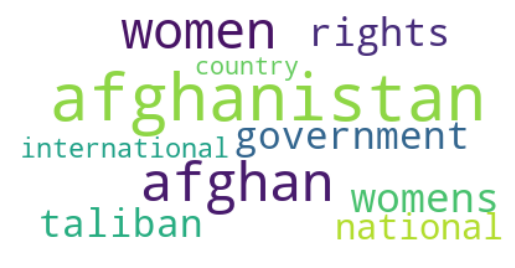

-1


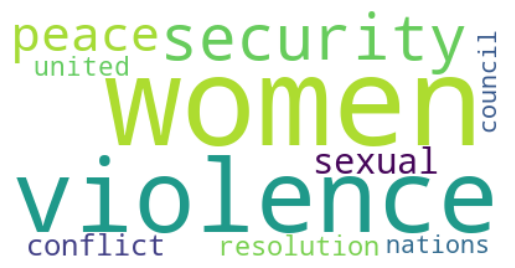

In [60]:
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
for topic_n in set(topic_model.topics_):
    print(topic_n)
    create_wordcloud(topic_model, topic=topic_n)


In [61]:
topics_over_time = topic_model.topics_over_time(docs, years)
topic_model.visualize_topics_over_time(topics_over_time, topics=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
## CHINA, DOES NOT WORK (TOO LITTLE DATA?? ONLY EVER TWO TOPICS)

In [63]:
vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model)

# read data
df = pd.read_csv('../data/wps_speeches.csv')
df['only text'] = df['only text'].astype(str)
china_df = df[df['country/organization'] == 'China']
docs = china_df['only text'].tolist()
years = china_df['year'].tolist()

# get topics and probs
topics, probs = topic_model.fit_transform(docs)
#topic_model.reduce_topics(docs, nr_topics=10)

# Access updated topics
#topics = topic_model.topics_
topic_model.get_topic_info()
#topic_model.visualize_topics()
topics_over_time = topic_model.topics_over_time(docs, years)
topic_model.visualize_topics_over_time(topics_over_time)


In [64]:
topic_model.get_topic_info()

Topic  Count                                  Name  \
0     -1      6     -1_countries_women_peace_security   
1      0     22  0_women_security_peace_international   
2      1     19      1_sexual_violence_conflict_women   

                                      Representation  \
0  [countries, women, peace, security, peacebuild...   
1  [women, security, peace, international, counci...   
2  [sexual, violence, conflict, women, internatio...   

                                 Representative_Docs  
0  [ I wish to thank Secretary-General Ban Ki-moo...  
1  [ First of all, I thank the Bolivian presidenc...  
2  [ The Chinese delegation wishes to thank Niger...

In [65]:
# WOMEN vs. MEN

In [66]:
# Men mentioned
men_keywords = r"\b(men|man|boy|boys)\b"
# Women mentioned
women_keywords = r"\b(women|woman|girl|girls)\b"

def filter_sentences(text, keyword_pattern):
    '''get sentences with keyword pattern (men or women)'''
    sentences = nltk.sent_tokenize(text)
    matching_sentences = [sentence for sentence in sentences if re.search(keyword_pattern, sentence, re.IGNORECASE)]

    return matching_sentences

def filter_sentences_only(text, keyword_pattern, exclude_pattern=None):
    '''get sentences with exclusive keyword pattern (e.g, "women" occurs in sentence but not "men")'''
    sentences = nltk.sent_tokenize(text)
    if exclude_pattern:
        matching_sentences = [sentence for sentence in sentences if re.search(keyword_pattern, sentence, re.IGNORECASE) and not re.search(exclude_pattern, sentence, re.IGNORECASE)]
    else:
        matching_sentences = [sentence for sentence in sentences if re.search(keyword_pattern, sentence, re.IGNORECASE)]
    return matching_sentences

def filter_text(df, keyword_pattern):
    filtered_sentences = []
    df['only text'] = df['only text'].astype(str)
    for text in df['only text']:
        sentences = filter_sentences(text, keyword_pattern)
        filtered_sentences.extend(sentences)

    return filtered_sentences

def filter_text_only(df, keyword_pattern, exclude_pattern=None):
    filtered_sentences = []
    df['only text'] = df['only text'].astype(str)
    for text in df['only text']:
        sentences = filter_sentences_only(text, keyword_pattern, exclude_pattern)
        filtered_sentences.extend(sentences)

    return filtered_sentences

df_men_sentences = filter_text(df, men_keywords)
df_women_sentences = filter_text(df, women_keywords)
df_men_sentences_only = filter_text_only(df, men_keywords, exclude_pattern=women_keywords)
df_women_sentences_only = filter_text_only(df, women_keywords, exclude_pattern=men_keywords)

In [67]:
total_men_sentences = len(df_men_sentences)
men_with_women = total_men_sentences - len(df_men_sentences_only)
men_without_women = len(df_men_sentences_only)

men_with_women_percentage = (men_with_women / total_men_sentences) * 100
men_without_women_percentage = (men_without_women / total_men_sentences) * 100

total_women_sentences = len(df_women_sentences)
women_with_men = total_women_sentences - len(df_women_sentences_only)
women_without_men = len(df_women_sentences_only)

women_with_men_percentage = (women_with_men / total_women_sentences) * 100
women_without_men_percentage = (women_without_men / total_women_sentences) * 100

print(f"Amount of sentences with occurrence of 'men, man, boy, or boys': {total_men_sentences}")
print(f"Amount of sentences with occurrence of 'women, woman, girl, or girls': {total_women_sentences}")
print(f"Amount of sentences with occurrence of 'men, man, boy, or boys' (no women mentioned): {men_without_women}")
print(f"Amount of sentences with occurrence of 'women, woman, girl, or girls' (no men mentioned): {women_without_men}")
print(f"Percentage of sentences with men and women mentioned together (of men): {men_with_women_percentage:.2f}%")
print(f"Percentage of sentences with men mentioned without women: {men_without_women_percentage:.2f}%")
print(f"Percentage of sentences with women and men mentioned together (of women): {women_with_men_percentage:.2f}%")
print(f"Percentage of sentences with women mentioned without men: {women_without_men_percentage:.2f}%")

Amount of sentences with occurrence of 'men, man, boy, or boys': 1428
Amount of sentences with occurrence of 'women, woman, girl, or girls': 31439
Amount of sentences with occurrence of 'men, man, boy, or boys' (no women mentioned): 276
Amount of sentences with occurrence of 'women, woman, girl, or girls' (no men mentioned): 30287
Percentage of sentences with men and women mentioned together (of men): 80.67%
Percentage of sentences with men mentioned without women: 19.33%
Percentage of sentences with women and men mentioned together (of women): 3.66%
Percentage of sentences with women mentioned without men: 96.34%


In [68]:
### TOPICS

In [69]:
topic_model = BERTopic(vectorizer_model=vectorizer_model)

## WOMEN ONLY
# get topics and probs
topics, probs = topic_model.fit_transform(df_women_sentences_only)
topic_model.visualize_topics()

In [70]:
topic_model.get_topic_info()

Topic  Count                                               Name  \
0       -1  12242             -1_conflict_women_participation_womens   
1        0   1189              0_1325_2000_resolution_implementation   
2        1    980            1_council_councils_security_resolutions   
3        2    591            2_displaced_refugees_internally_refugee   
4        3    539                   3_agenda_security_peace_progress   
..     ...    ...                                                ...   
326    325     10  325_responsibility_goal_specificities_institut...   
327    326     10    326_regional_needto_rapprochement_nationallevel   
328    327     10        327_talk_inflicted_isolate_crisismanagement   
329    328     10         328_unicef_programme_commissioner_agencies   
330    329     10               329_cureall_59_nature_unconscionable   

                                        Representation  \
0    [conflict, women, participation, womens, peace...   
1    [1325, 2000, resolution, implementation, adopt...   
2    [council, councils, security, resolutions, man...   
3    [displaced, refugees, internally, refugee, per...   
4    [agenda, security, peace, progress, implementa...   
..                                                 ...   
326  [responsibility, goal, specificities, institut...   
327  [regional, needto, rapprochement, nationalleve...   
328  [talk, inflicted, isolate, crisismanagement, w...   
329  [unicef, programme, commissioner, agencies, fu...   
330  [cureall, 59, nature, unconscionable, aspect, ...   

                                   Representative_Docs  
0    [The briefings we have heard at this important...  
1    [Since resolution 1325 (2000) was adopted 15 y...  
2    [We welcome the use of background information ...  
3    [Displacement makes refugees and internally di...  
4    [Despite the significant progress we have made...  
..                                                 ...  
326  [To ensure adequate protection of women and gi...  
327  [In that regard, while the rapprochement with ...  
328  [We cannot remain silent about the injustice d...  
329  [The United Nations and its agencies - the Uni...  
330  [If there is one area where the implementation...  

[331 rows x 5 columns]

In [71]:
# reduce topics (from 311 to 10)
topic_model.reduce_topics(df_women_sentences_only, nr_topics=10)

In [72]:
topics = topic_model.topics_
topic_model.get_topic_info()

Topic  Count                                       Name  \
0     -1  12242             -1_women_peace_conflict_womens   
1      0  16304          0_women_peace_security_resolution   
2      1   1064              1_ms_thank_director_executive   
3      2    359  2_trafficking_persons_children_especially   
4      3    174                 3_boko_haram_girls_nigeria   
5      4     76           4_friends_behalf_delivered_group   
6      5     28        5_georgia_regions_occupied_georgias   
7      6     16         6_casualties_children_civilians_90   
8      7     12       7_blue_helmets_training_peacekeepers   
9      8     12                  8_girl_met_mama_17yearold   

                                      Representation  \
0  [women, peace, conflict, womens, security, vio...   
1  [women, peace, security, resolution, womens, c...   
2  [ms, thank, director, executive, debate, secur...   
3  [trafficking, persons, children, especially, c...   
4  [boko, haram, girls, nigeria, raped, chibok, r...   
5  [friends, behalf, delivered, group, aligns, st...   
6  [georgia, regions, occupied, georgias, abkhazi...   
7  [casualties, children, civilians, 90, cent, es...   
8  [blue, helmets, training, peacekeepers, number...   
9  [girl, met, mama, 17yearold, 15yearold, woman,...   

                                 Representative_Docs  
0  [The equal participation of women in the promo...  
1  [During the past decade, the Security Council ...  
2  [ I would like to thank you, Mr. President, fo...  
3  [An example is the United Nations Convention a...  
4  [This month marks the first anniversary of the...  
5  [Ireland aligns itself with the statement deli...  
6  [While underlining the significance of strengt...  
7  [It is estimated that the number of civilian l...  
8  [In our View it is crucial to train Blue Helme...  
9  [One woman described having been abducted whil...

In [73]:
topic_model.visualize_topics()

0


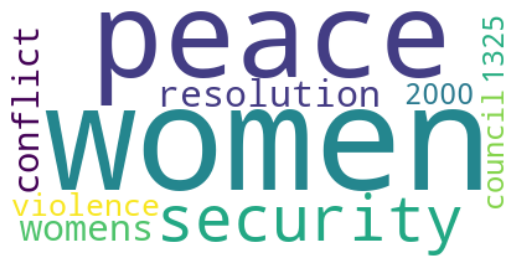

1


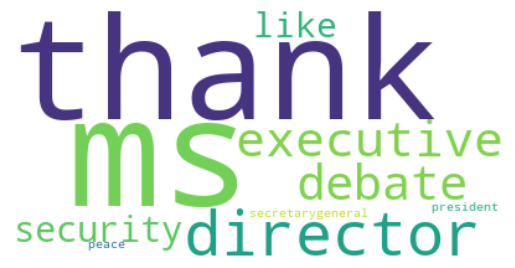

2


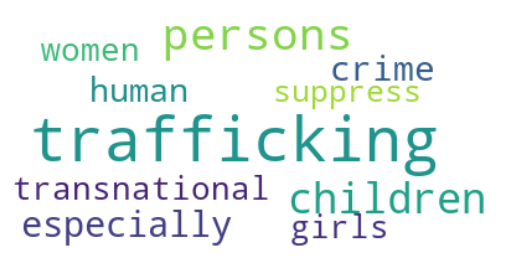

3


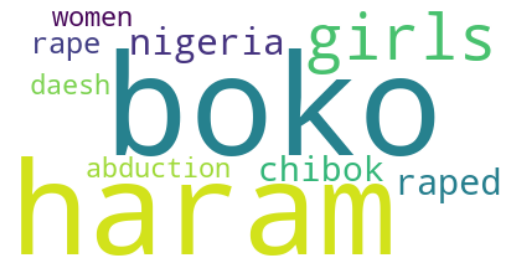

4


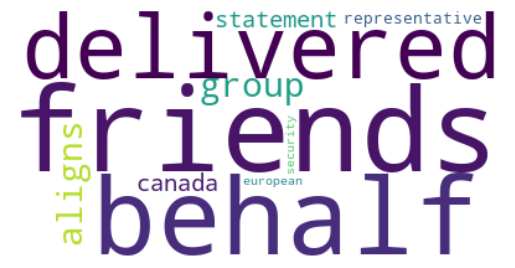

5


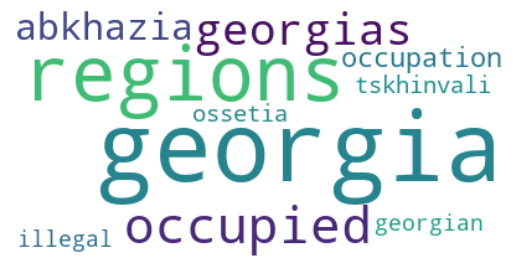

6


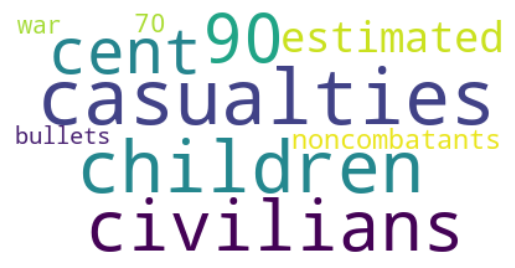

7


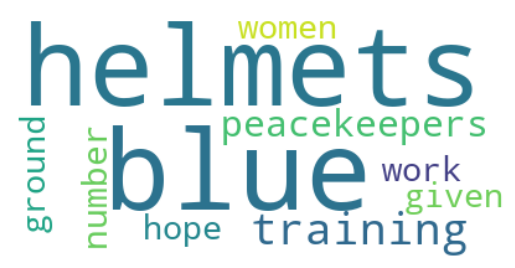

8


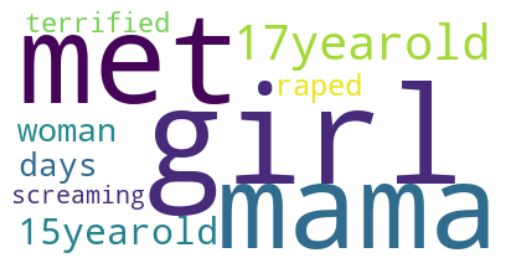

-1


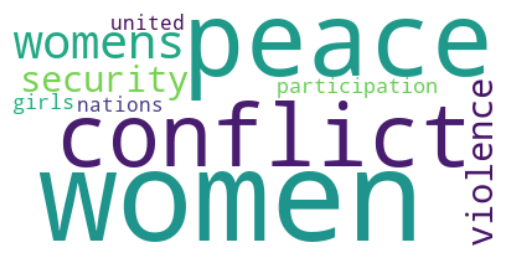

In [74]:
# Show wordcloud
for topic_n in set(topic_model.topics_):
    print(topic_n)
    create_wordcloud(topic_model, topic=topic_n)

In [75]:
topic_model = BERTopic(vectorizer_model=vectorizer_model)

## MEN ONLY
# get topics and probs
topics, probs = topic_model.fit_transform(df_men_sentences_only)
topic_model.get_topic_info()

Topic  Count                           Name  \
0     -1     75  -1_men_violence_boys_conflict   
1      0    103     0_sexual_violence_boys_men   
2      1     42     1_men_gender_role_equality   
3      2     16          2_man_isis_noora_beat   
4      3     14       3_cent_united_nations_97   
5      4     14  4_peace_men_ones_negotiations   
6      5     12        5_man_later_saying_came   

                                      Representation  \
0  [men, violence, boys, conflict, prevention, ne...   
1  [sexual, violence, boys, men, rape, armed, chi...   
2  [men, gender, role, equality, need, traditiona...   
3  [man, isis, noora, beat, village, house, marry...   
4  [cent, united, nations, 97, police, military, ...   
5  [peace, men, ones, negotiations, conflict, mat...   
6  [man, later, saying, came, leaders, business, ...   

                                 Representative_Docs  
0  [In addition, the absence of targeted services...  
1  [The current report highlights several emergin...  
2  [Thirdly, it has not been mentioned by many pe...  
3  [We are speaking about Noora, an 11-year-old f...  
4  [In this regard, it is regrettable that the fi...  
5  [It is interesting, by the way, that no one, i...  
6  [A man named David said:  "They would give us ...

In [76]:
topic_model.visualize_topics()

0


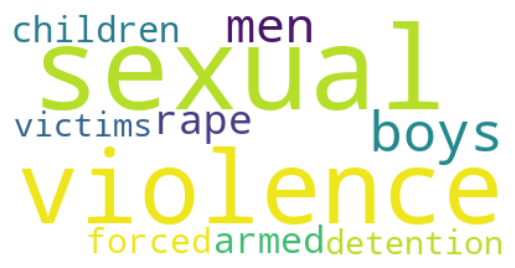

1


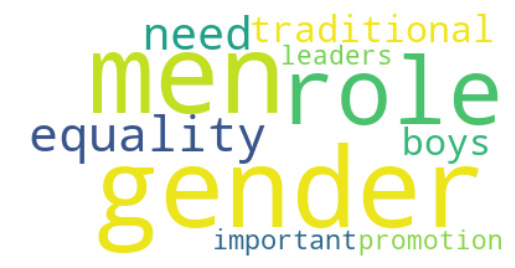

2


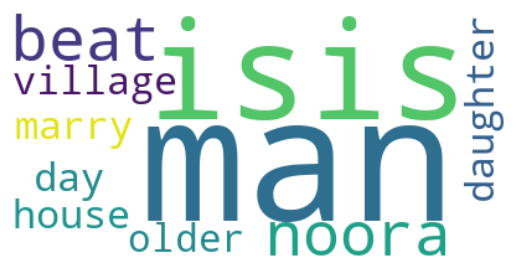

3


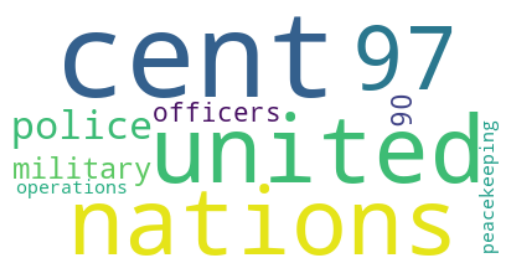

4


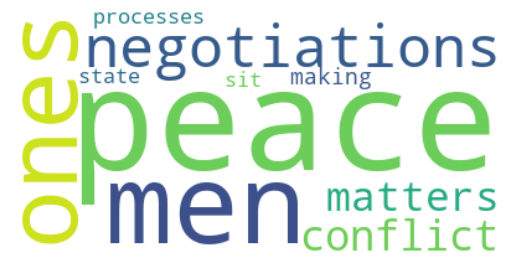

5


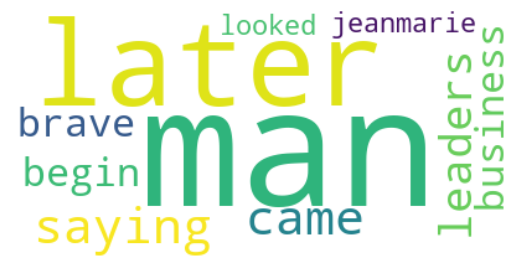

-1


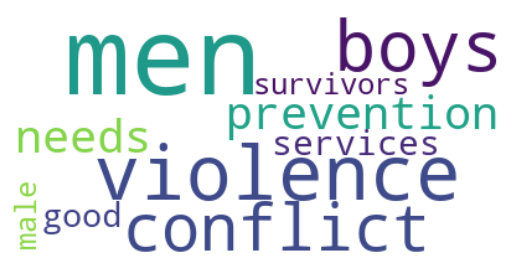

In [80]:
# Show wordcloud
for topic_n in set(topic_model.topics_):
    print(topic_n)
    create_wordcloud(topic_model, topic=topic_n)

In [78]:
### women are much more talked about, with more variety 